# Assignment 05

## Plot the training data

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


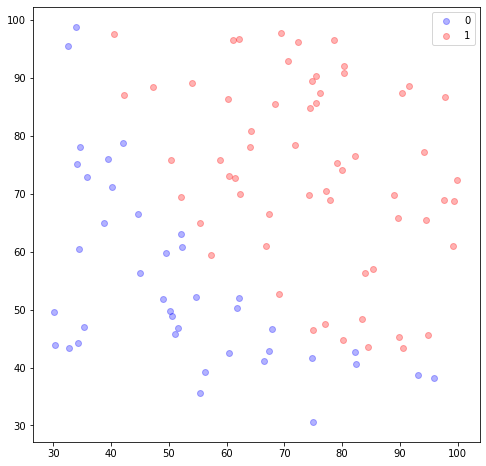

In [1]:
!pip install tqdm
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D


data = np.genfromtxt("data.txt", delimiter=',')

x = data[:, 0]
y = data[:, 1]
label = data[:, 2]

x_label0 = x[label == 0]
x_label1 = x[label == 1]

y_label0 = y[label == 0]
y_label1 = y[label == 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=0.3, c='b', label='0')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r', label='1')
plt.legend()
plt.show()

x_train = (data[:, :2] - 65) / 70
y_train = data[:, 2:]


load the training data file ('data.txt')
$ x, y \in \mathbb{R}$ and $l \in \{0, 1\} $

Input data bave value between 30, 100  
We did feature scaling to have values between -0.5 and 0.5.  
$ x := (x - 65) / 70 $  
$ y := (y - 65) / 70 $ 

In [2]:
# Declare linear model

class BinaryClassification:
    def __init__(self):
        self.weight = np.random.normal(0, 0.01, 2)
        self.bias = np.zeros(1)

    def __call__(self, x: np.ndarray):
        x = (self.weight * x).sum(axis=1, keepdims=True) + self.bias
        x = 1 / (1 + np.exp(-x)) 
        return x
    
    def __str__(self):
        return f'f(x,y)=sigmoid({self.bias[0]:.6f} + {self.weight[0]:.6f}x + {self.weight[1]:.6f}y)'  

def BCELoss(pred: np.ndarray, label: np.ndarray):
    return -(label * np.log(pred) + (1 - label) * np.log(1 - pred)).mean(dtype=np.float64)

### Model
$f_\theta(x, y) = \theta_0 + \theta_1 x + \theta_2 y $, where $\theta = (\theta_0, \theta_1, \theta_2)$ and $\theta_0, \theta_1, \theta_2 \in \mathbb{R}$  
initial parameter is $\theta_0 = 0$ and $\theta_1, \theta_2$ iid $N(0, 0.01^2)$

In [3]:
learning_rate = 5

model = BinaryClassification()

losses = []
weights = []
biases = []
step = 0
e = 1e-9

while(step < 2 or losses[-2] - losses[-1] > e):
    # BCELoss
    loss: np.ndarray = BCELoss(model(x_train), y_train)  
    
    # Save losses and parameters
    losses += [loss.tolist()]
    weights += [model.weight.tolist()]
    biases += [model.bias.tolist()]
    
    # Compute Error
    error = model(x_train) - y_train
    
    # Gradient Descent Algorithm
    temp_bias = model.bias - learning_rate * error.mean()
    temp_weight = model.weight - learning_rate * (error * x_train).mean(axis=0)
    
    # Update parameter
    model.bias = temp_bias
    model.weight = temp_weight
    step += 1

losses = np.asarray(losses)
weights = np.asarray(weights)
biases = np.asarray(biases)

print(f'Train step is {step}')
print(f'The optimal linear model is {model}')
print(f'Train loss: {loss:.4f}')

Train step is 2305
The optimal linear model is f(x,y)=sigmoid(1.337450 + 14.415074x + 14.081546y)
Train loss: 0.2035


### Objective function: MSELoss  
$J(\theta_0, \theta_1, \theta_2) = \frac{1}{m} \sum_{i=1}^m ( - l^{(i)} \log(\sigma(z^{(i)})) - (1 - l^{(i)}) \log(1 - \sigma(z^{(i)}))  )$  

### Gradient Descent Algorithm  
$\theta_0^{(t+1)} := \theta_0^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (\sigma(z^{(i)}) - l^{(i)})$  
$\theta_1^{(t+1)} := \theta_1^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (\sigma(z^{(i)}) - l^{(i)}) x^{(i)}$  
$\theta_2^{(t+1)} := \theta_2^{(t)} - \alpha \frac{1}{m} \sum_{i=1}^{m} (\sigma(z^{(i)}) - l^{(i)}) y^{(i)}$  

initial learning rate is 5 and train is Training continues until the loss change is less than 1e-10

## Plot the estimated parameters

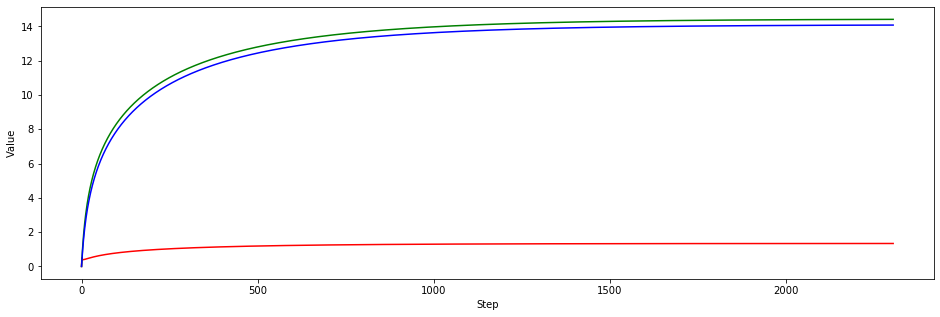

In [4]:
plt.figure(figsize=(16, 5))
plt.plot(biases, color='red')
plt.plot(weights[:, 0], color='green')
plt.plot(weights[:, 1], color='blue')

plt.xlabel('Step')
plt.ylabel('Value')
plt.show()

# Plot the training error

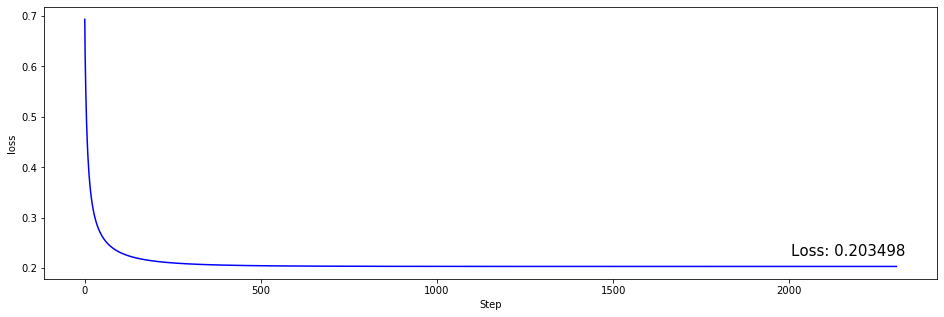

In [5]:
plt.figure(figsize=(16, 5))
plt.plot(losses, 'b-')
plt.ylabel('loss')
plt.xlabel('Step')
plt.text(0.87*len(losses), losses[-1] * 1.1, f'Loss: {losses[-1]:5f}', size=15)
plt.show()

$J(\theta_0, \theta_1, \theta_2) = \frac{1}{m} \sum_{i=1}^m ( - l^{(i)} \log(\sigma(z^{(i)})) - (1 - l^{(i)}) \log(1 - \sigma(z^{(i)}))  )$  

## Plot the obtained classifier

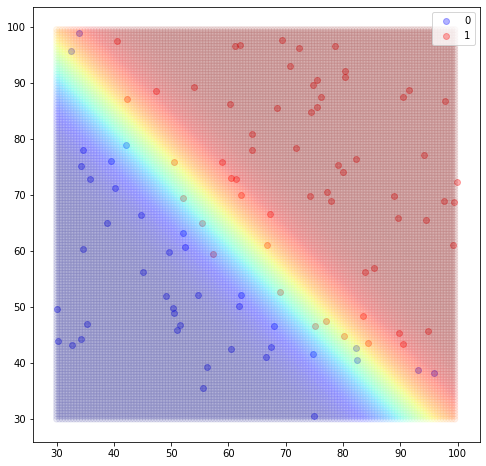

In [6]:
x = np.arange(30, 100, 0.5)
y = np.arange(30, 100, 0.5)
data = np.array(np.meshgrid(x, y)).T.reshape(-1,2)

plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=0.3, c='b', label='0')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r', label='1')
plt.scatter(data[:, 0], data[:, 1], c=model((data - 65) / 70).squeeze(), cmap='jet', alpha=0.08)
plt.legend()
plt.show()

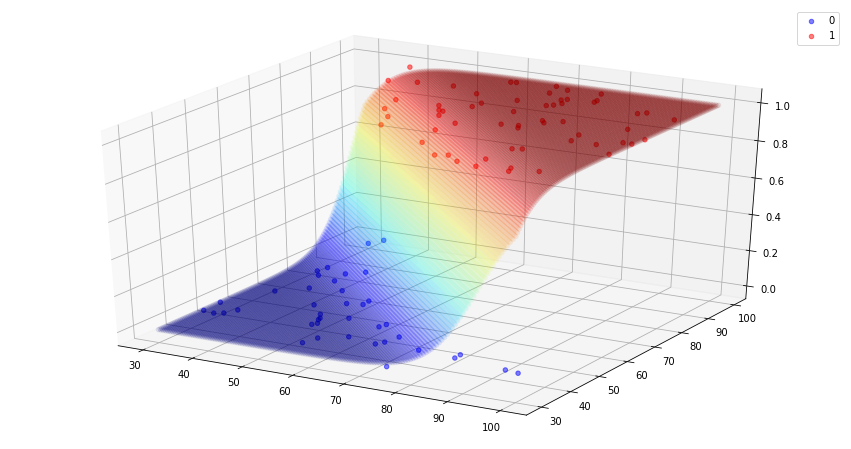

In [7]:
plt.figure(figsize=(15, 8))
ax = plt.axes(projection='3d')
ax.scatter(x_label0, y_label0, label[label==0], alpha=0.5, label='0', c='b')
ax.scatter(x_label1, y_label1, label[label==1], alpha=0.5, label='1', c='r')
ax.scatter(data[:, 0], data[:, 1], model((data - 65) / 70).squeeze(), c=model((data - 65) / 70).squeeze(), cmap='jet', alpha=0.08)
ax.legend()
plt.show()